In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# Google Drive path where project material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Dissertation'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['accepted_2013_to_2018_filtered.csv', 'FINAL_unbalancedData.csv', 'Final_balanced_data.csv', 'Cleaned_data.csv', 'accepted_2013_to_2018_latest1.csv', 'accepted_2013_to_2018_latest.csv', 'accepted_2007_to_2018q4.csv.zip', 'Cleaned_data_dummy.csv', '3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'y_data.csv', 'x_data.csv', 'FINAL_balancedData.csv', 'FINAL_forModeling.csv', 'ANN_model.joblib', 'Decsion_tree_model.joblib', 'Random_fores.joblib', '4_Individual_loans_hypothesisTesting_and_undersampling.ipynb', 'FINAL_balancedData_testing.csv', 'XGBoost_model.joblib', 'Untitled0.ipynb', 'Logistic_Regression.joblib', 'Model_5_ANN.ipynb', 'Model_4_XGBoost.ipynb', 'Model_3_Random_Forest.ipynb', 'Model_2_Decesion_Tree.ipynb', 'Model_1_Logistic_regression.ipynb', 'Random_forest_model_feature_selection_and_encoding.ipynb', 'XGBoost_model_feature_selection_and_encoding.ipynb', 'XAI_RandomForest.ipynb', '1_Filter_data_2013_to_2018.ipynb', '2_Filter_data_on_Loan_status.ipynb', '4_latest_Individu

In [3]:
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as  plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, recall_score, f1_score
import joblib
from sklearn.metrics import RocCurveDisplay

In [4]:
#Read dependent variable 'y' and independent variable 'X'
X = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'x_data.csv'))
y = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'y_data.csv'))

In [5]:
X.head()

,int_rate,sub_grade,term_years,inq_last_6mths,grade,mths_since_last_delinq,num_tl_op_past_12m,Not Verified,acc_open_past_24mths,MORTGAGE,fico_score,num_rev_tl_bal_gt_0,emp_length_years,Source Verified,mths_since_last_record,num_actv_rev_tl,pub_rec,Verified,mths_since_recent_inq,mort_acc
0,13.67,12,3,1.0,2,999.000000,12.000000,0,17.000000,1,662.0,9.0,6.000000,0,25.0,9.0,1.0,1,4.000000,0.0
1,9.99,7,3,0.0,1,8.991708,0.747927,0,2.747927,0,682.0,2.0,8.747927,1,999.0,2.0,0.0,0,8.747927,0.0
2,10.99,8,3,0.0,1,67.000000,4.000000,0,6.000000,1,682.0,4.0,10.000000,1,999.0,4.0,0.0,0,10.000000,3.0
3,9.17,6,3,0.0,1,61.000000,0.000000,0,3.000000,1,677.0,10.0,10.000000,0,999.0,8.0,0.0,1,15.000000,2.0
4,15.59,14,3,0.0,2,7.000000,1.000000,0,9.000000,0,667.0,6.0,1.000000,1,999.0,6.0,0.0,0,8.000000,0.0


In [ ]:
#to display all features and observations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Split the data into train and test in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 129)

In [ ]:
loan_distribution = y_train.value_counts(normalize=True)
# default weught wrt to fully paid loan weight
default_weight = loan_distribution[0] / loan_distribution[1]
print(f"default_weight: {default_weight}") #print default weight


default_weight: 1.9734412677700015


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state = 49, class_weight={0: 1, 1: default_weight})


In [ ]:
#Grid search on maximum depth and max leaf nodes to perform pruning of tree
grid = {'max_depth':[10,15,20,12],
       'max_leaf_nodes': [10,12,15,20,30]}


In [ ]:
#performing grid search on 5 fold cross validation
gcv_dt = GridSearchCV(estimator= dt_classifier , param_grid = grid, n_jobs =-1, cv =5)
gcv_dt.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                            1: 1.9734412677700015},
                                              random_state=49),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 12],
                         'max_leaf_nodes': [10, 12, 15, 20, 30]})

In [ ]:
gcv_dt.best_estimator_ #display hyperparameters for best model

DecisionTreeClassifier(class_weight={0: 1, 1: 1.9734412677700015}, max_depth=10,
                       max_leaf_nodes=15, random_state=49)

In [ ]:
best_model_dt = gcv_dt.best_estimator_ #select best model hyperparameters
best_model_dt.fit(x_train,y_train)  #train model best hyper parameters

DecisionTreeClassifier(class_weight={0: 1, 1: 1.9734412677700015}, max_depth=10,
                       max_leaf_nodes=15, random_state=49)

In [ ]:
best_model_dt.score(x_train,y_train) #train accuracy

0.6735227784275092

In [ ]:
best_model_dt.score(x_test,y_test) #test Accuracy

0.6759971406855116

In [ ]:
y_pred = best_model_dt.predict(x_test) #predictions

In [ ]:
print("Classification Report:") #print classification report
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74    146697
           1       0.51      0.64      0.57     74335

    accuracy                           0.68    221032
   macro avg       0.65      0.67      0.65    221032
weighted avg       0.70      0.68      0.68    221032



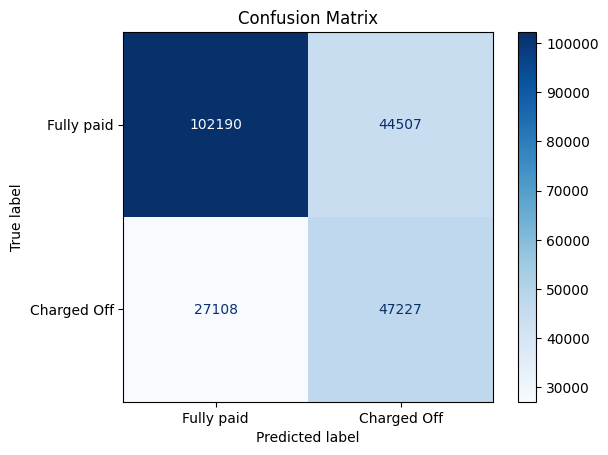

In [ ]:
#display confusion matrics
cm_dt = confusion_matrix(y_test, y_pred)
display_cm= ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Fully paid', 'Charged Off'])
display_cm.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predictions to calculate performance metrices
y_train_pred_dt = best_model_dt.predict(x_train)
y_test_pred_dt= best_model_dt.predict(x_test)
y_test_pred_proba_dt = best_model_dt.predict_proba(x_test)[:, 1]

# performance metrices
train_accuracy = accuracy_score(y_train, y_train_pred_dt)
test_accuracy = accuracy_score(y_test, y_test_pred_dt)
precision = precision_score(y_test, y_test_pred_dt)
recall = recall_score(y_test, y_test_pred_dt)
f1 = f1_score(y_test, y_test_pred_dt)
auc = roc_auc_score(y_test, y_test_pred_proba_dt)

# Print performance results
print(f"Train Accuracy of decsion tree: {train_accuracy*100}")
print(f"Test Accuracy of decsion tree: {test_accuracy*100}")
print(f"Precision decsion tree: {precision*100}")
print(f"Recall decsion tree: {recall *100}")
print(f"F1 Score decsion tree: {f1*100}")
print(f"AUC decsion tree: {auc *100}")

Train Accuracy of decsion tree: 67.35227784275092
Test Accuracy of decsion tree: 67.59971406855117
Precision decsion tree: 51.4825473652081
Recall decsion tree: 63.53265621847044
F1 Score decsion tree: 56.876358622018564
AUC decsion tree: 72.07044278117073


[Text(0.4852941176470588, 0.9285714285714286, 'sub_grade <= 9.5\ngini = 0.5\nsamples = 884126\nvalue = [586785.0, 586785.0]\nclass = Default'),
 Text(0.23529411764705882, 0.7857142857142857, 'int_rate <= 8.19\ngini = 0.438\nsamples = 377062\nvalue = [303216.0, 145730.744]\nclass = Fully Paid'),
 Text(0.3602941176470588, 0.8571428571428572, 'True  '),
 Text(0.17647058823529413, 0.6428571428571429, 'gini = 0.312\nsamples = 132011\nvalue = [117683.0, 28275.466]\nclass = Fully Paid'),
 Text(0.29411764705882354, 0.6428571428571429, 'MORTGAGE <= 0.5\ngini = 0.475\nsamples = 245051\nvalue = [185533.0, 117455.277]\nclass = Fully Paid'),
 Text(0.23529411764705882, 0.5, 'Not Verified <= 0.5\ngini = 0.495\nsamples = 128138\nvalue = [90362.0, 74548.717]\nclass = Fully Paid'),
 Text(0.17647058823529413, 0.35714285714285715, 'Source Verified <= 0.5\ngini = 0.5\nsamples = 87567\nvalue = [58387.0, 57585.016]\nclass = Fully Paid'),
 Text(0.11764705882352941, 0.21428571428571427, 'Verified <= 0.5\ngini 

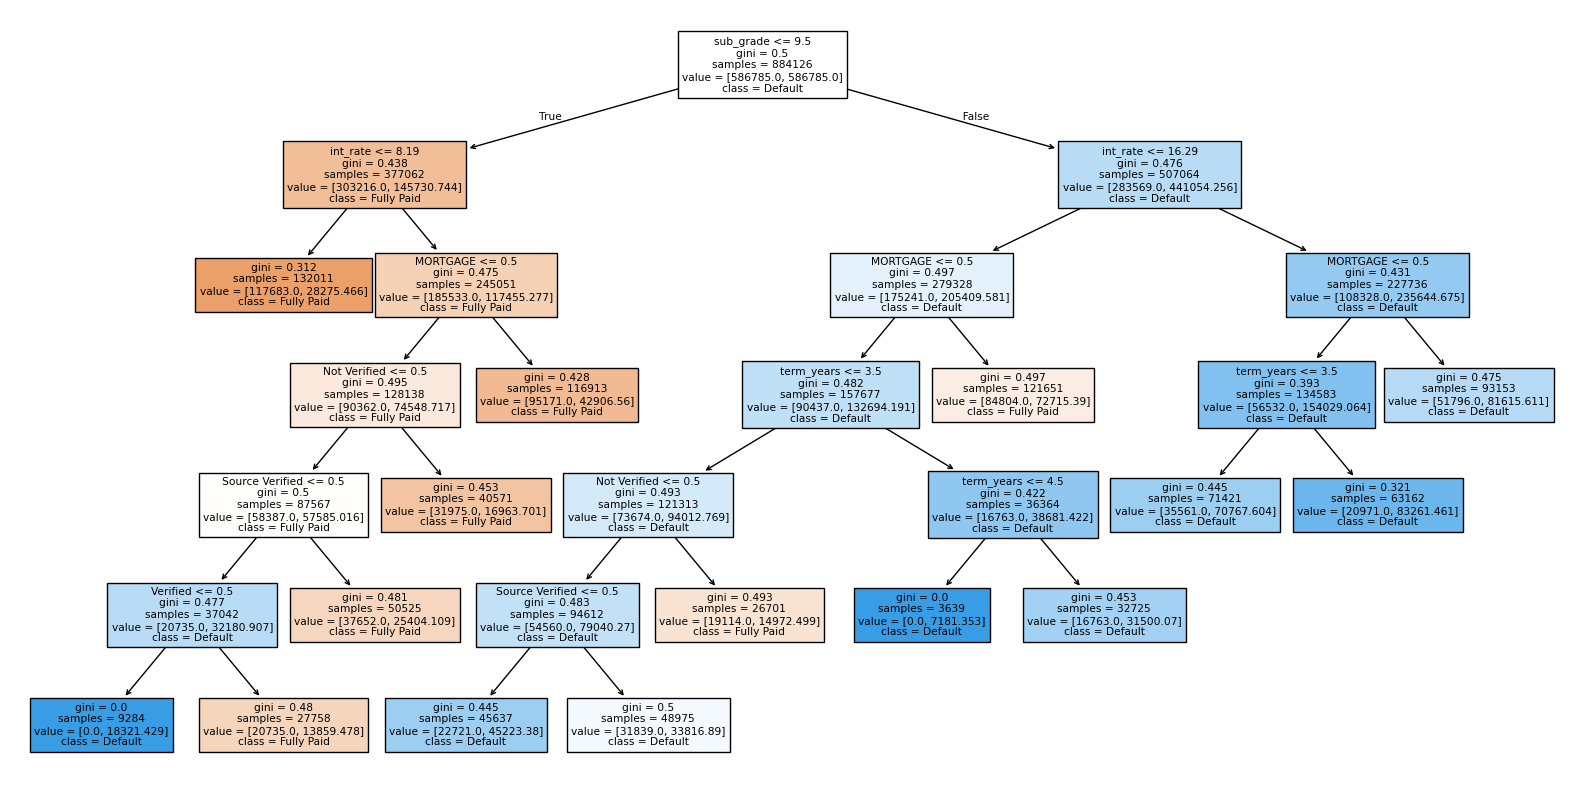

In [ ]:
#_------------------------------------------------------Interpretebility of Decsion Tree using tree hierarcy splitted by Gini value------------------------------------------------------------------
plt.figure(figsize = (20,10))
tree.plot_tree(best_model_dt, feature_names= list(X.columns), class_names= ['Fully Paid', 'Default'], filled = True)

In [ ]:
feature_importance =best_model_dt.feature_importances_ #feature importance obtained from best decsion tree model

In [ ]:
feature_importance = pd.Series(feature_importance, index = X.columns).sort_values(ascending=False)

Text(0, 0.5, 'Feature Importance')

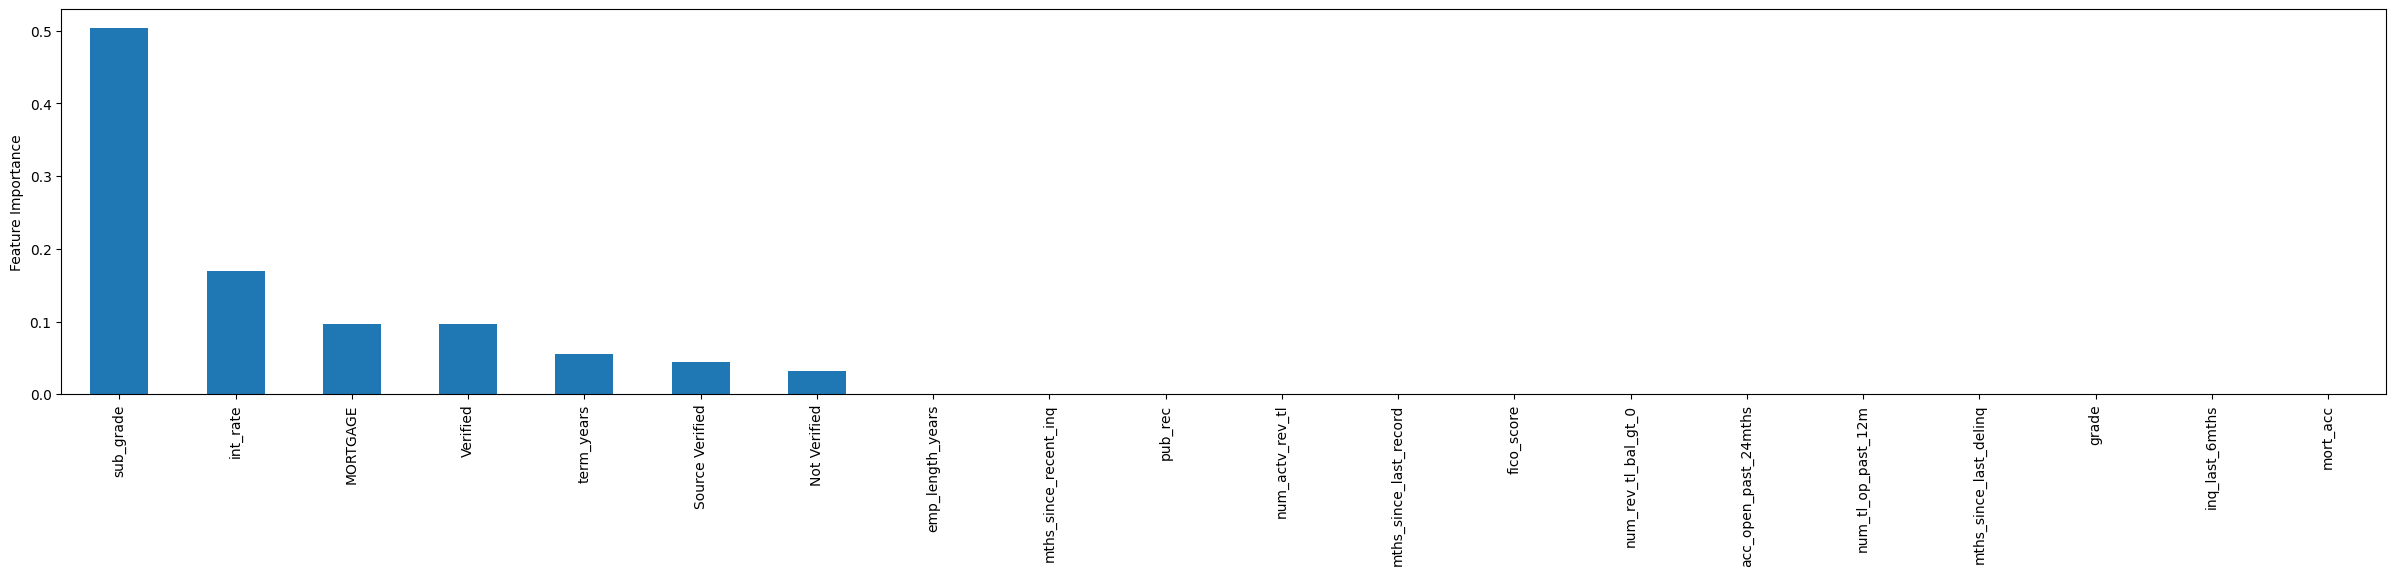

In [ ]:
feature_importance.plot(kind = 'bar', figsize=(30,5))
plt.ylabel("Feature Importance")

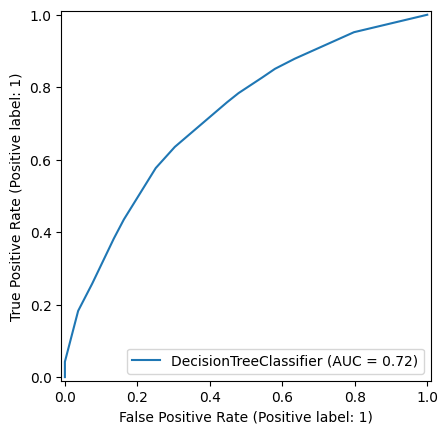

In [ ]:
#display ROC curve
RocCurveDisplay.from_estimator(best_model_dt, x_test, y_test)

In [ ]:
#---------------------------------test the saved model------------------------------------------

In [ ]:
joblib.dump(best_model_dt, 'drive/My Drive/Disertation/Decsion_tree_model.joblib')

In [ ]:
loaded_dt_model = joblib.load('drive/My Drive/Disertation/Decsion_tree_model.joblib')

In [ ]:
y_testing = loaded_dt_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_testing)

0.6759971406855116